In [61]:
import pandas as pd

df=pd.read_csv("HDFC.csv")
# df=df.drop(columns=['Turnover'])
# df=df.iloc[:,1:]
# df=df['Open']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5306 non-null   object 
 1   Prev Close  5306 non-null   float64
 2   Open        5306 non-null   float64
 3   High        5306 non-null   float64
 4   Low         5306 non-null   float64
 5   Last        5306 non-null   float64
 6   Close       5306 non-null   float64
 7   VWAP        5306 non-null   float64
 8   Volume      5306 non-null   int64  
 9   Turnover    5306 non-null   float64
 10  future      5306 non-null   int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 456.1+ KB


In [62]:
X=df['Open']
y=df['future']
X,y

(0        293.50
 1        317.00
 2        290.00
 3        301.00
 4        290.00
          ...   
 5301    2500.00
 5302    2494.15
 5303    2516.10
 5304    2590.90
 5305    2503.10
 Name: Open, Length: 5306, dtype: float64,
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 5301    1
 5302    1
 5303    1
 5304    0
 5305    0
 Name: future, Length: 5306, dtype: int64)

In [63]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

X_train

2126    2199.00
1463     920.05
2948     647.00
197      444.05
3469     780.50
         ...   
905      468.90
5192    2297.25
3980    1218.20
235      537.00
5157    1694.00
Name: Open, Length: 4244, dtype: float64

In [64]:
from sklearn.preprocessing import MinMaxScaler 
scaler =MinMaxScaler ()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

X_train_scaled

ValueError: Expected 2D array, got 1D array instead:
array=[2199.    920.05  647.   ... 1218.2   537.   1694.  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [46]:
import tensorflow
from tensorflow import keras 
from keras import Sequential 
from keras.layers import Dense


model=Sequential()
model.add(Dense(8,activation='relu',input_dim=8))
model.add(Dense(7,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='linear'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 8)                 72        
                                                                 
 dense_42 (Dense)            (None, 7)                 63        
                                                                 
 dense_43 (Dense)            (None, 6)                 48        
                                                                 
 dense_44 (Dense)            (None, 5)                 35        
                                                                 
 dense_45 (Dense)            (None, 4)                 24        
                                                                 
 dense_46 (Dense)            (None, 3)                 15        
                                                                 
 dense_47 (Dense)            (None, 2)                

In [47]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [55]:
history=model.fit(X_train_scaled,y_train,epochs=150,validation_split=0.2)

Epoch 1/150
107/107 [==============================] - 0s 3ms/step - loss: 0.0767 - val_loss: 0.0894
Epoch 2/150
107/107 [==============================] - 0s 2ms/step - loss: 0.0852 - val_loss: 0.0625
Epoch 3/150
107/107 [==============================] - 0s 2ms/step - loss: 0.0800 - val_loss: 0.1002
Epoch 4/150
107/107 [==============================] - 0s 3ms/step - loss: 0.0791 - val_loss: 0.0650
Epoch 5/150
107/107 [==============================] - 0s 2ms/step - loss: 0.0760 - val_loss: 0.0611
Epoch 6/150
107/107 [==============================] - 0s 2ms/step - loss: 0.0986 - val_loss: 0.0799
Epoch 7/150
107/107 [==============================] - 0s 2ms/step - loss: 0.0773 - val_loss: 0.0788
Epoch 8/150
107/107 [==============================] - 0s 3ms/step - loss: 0.0727 - val_loss: 0.1035
Epoch 9/150
107/107 [==============================] - 0s 3ms/step - loss: 0.0851 - val_loss: 0.0757
Epoch 10/150
107/107 [==============================] - 0s 2ms/step - loss: 0.0679 - val_lo

In [56]:
y_pred=model.predict(X_test_scaled)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

34/34 [==============================] - 0s 3ms/step


0.8033872805651758

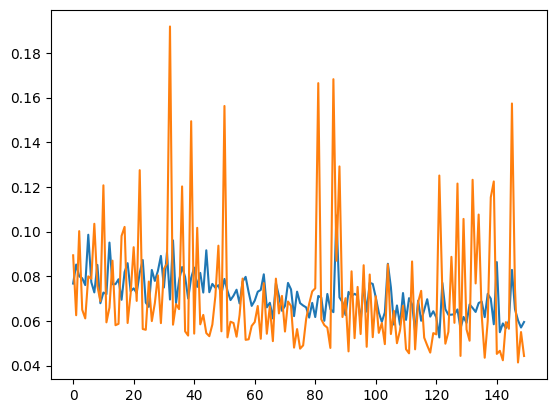

In [57]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])